In [149]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [150]:
mel = pd.read_csv('/content/drive/MyDrive/Datafiles/Melbourne_housing.csv')

In [151]:
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [152]:
mel = mel.rename(columns={"Bedroom2":"Bedroom"})

In [153]:
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [154]:
mel.shape

(34857, 21)

In [155]:
mel.isna().sum()   #Count the missing values in each column

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [156]:
mel_df = mel.copy()   #Make a copy of original data for manipulations

In [157]:
mel_df.Price.fillna(mel_df.Price.mean(), inplace=True)    #Impute missing price values with average price value

In [158]:
mel_df.Distance.fillna(method='ffill', inplace=True)     #Impute missing ditance values with preceding distance value

In [159]:
mel_df.Postcode.fillna(method='ffill', inplace=True)     #Impute missing postcode values with preceding postcode value

In [160]:
mel_df.Bedroom.fillna(mel_df.Bedroom.mode()[0], inplace=True)    #Impute missing bedroom values with most common bedroom value

In [161]:
mel_df.Bathroom.fillna(mel_df.Bathroom.mode()[0], inplace=True)   #Impute missing bathroom values with most common bathroom value

In [162]:
mel_df.Car.fillna(mel_df.Car.mode()[0], inplace=True)       #Impute missing car values with most common car value

In [163]:
mel_df.Landsize.fillna(mel_df.Landsize.mean(), inplace=True)     #Impute missing landsize values with average landsize value

In [164]:
mel_df.BuildingArea.fillna(mel_df.BuildingArea.mean(), inplace=True)    #Impute missing building area values with average building area value

In [165]:
mel_df.YearBuilt.fillna(math.floor(mel_df.YearBuilt.mean()), inplace=True)   #Impute missing year built values with average year built value but only integer part

In [166]:
mel_df.CouncilArea.fillna(method='ffill', inplace=True)       #Impute missing councilarea values with preceding councilarea value

In [167]:
mel_df.Regionname.fillna(method='ffill', inplace=True)       #Impute missing region name values with preceding region name value

In [168]:
mel_df.Propertycount.fillna(method='ffill', inplace=True)     #Impute missing property count values with preceding property count value

In [169]:
mel_df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom             0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude        7976
Longtitude       7976
Regionname          0
Propertycount       0
dtype: int64

In [170]:
mel_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,1.050173e+06,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,160.2564,1965.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,160.2564,1965.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0000,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,1.050173e+06,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,160.2564,1965.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0000,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


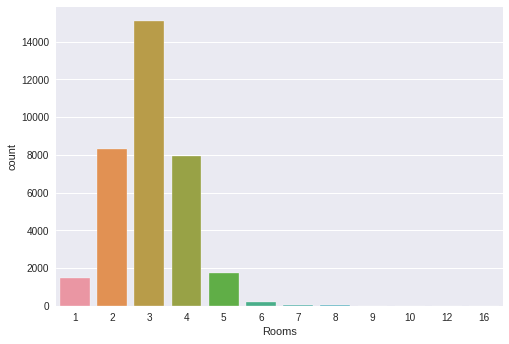

In [171]:
sns.set_style('darkgrid')
plt.style.use('seaborn')
sns.countplot(mel_df['Rooms'])

In [172]:
# Most of the housings in Melbourne have 3 rooms followed by 2 and 4 rooms respectively.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[[Text(0, 0, 'House/Cottage/Villa'),
  Text(0, 0, 'Unit/Duplex'),
  Text(0, 0, 'Townhouse')]]

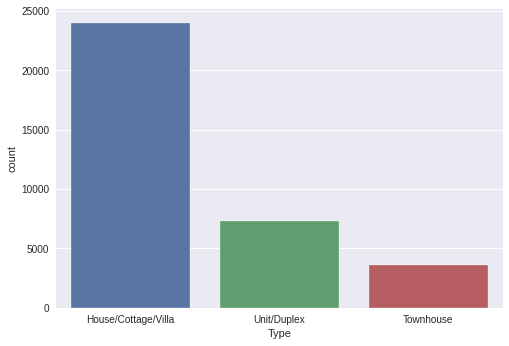

In [173]:
typePlot = sns.countplot(mel_df['Type'])
typePlot.set(xticklabels=['House/Cottage/Villa','Unit/Duplex','Townhouse'])

In [174]:
# Most common type of property in Melbourbe is house/cottage/villa.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


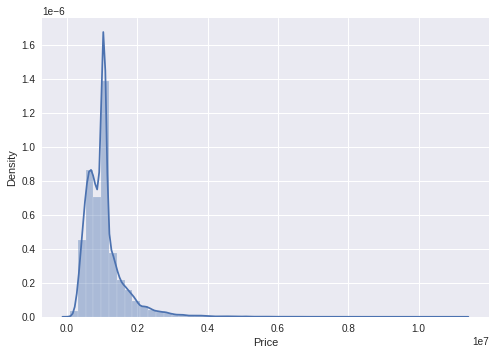

In [175]:
sns.distplot(mel_df['Price'])

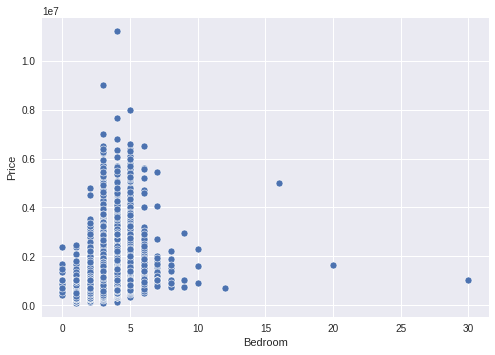

In [176]:
sns.scatterplot(x=mel_df['Bedroom'],y=mel_df['Price'])

In [177]:
# Houses with 3 to 5 bedrooms have the highest price range

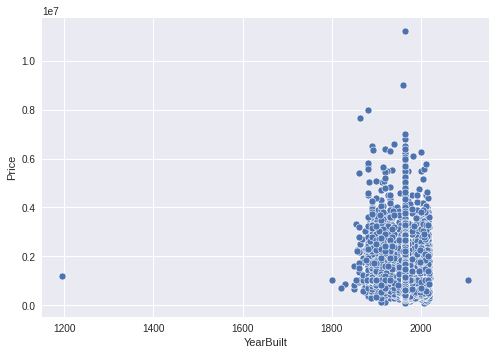

In [178]:
sns.scatterplot(x=mel_df['YearBuilt'],y=mel_df['Price'])

In [179]:
# No significant relationship between price of the house and the year it was built.

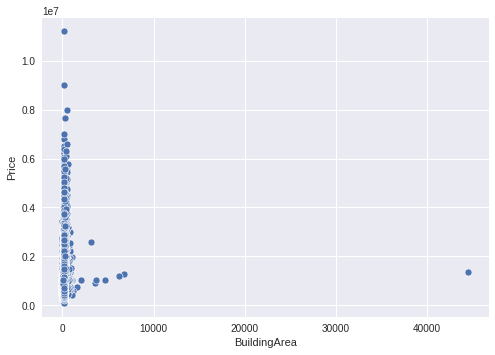

In [180]:
sns.scatterplot(x=mel_df['BuildingArea'],y=mel_df['Price'])

In [181]:
# No significant relationship between price of the house and the area of the building.

In [182]:
# Plotting on the map with geopandas

In [183]:
import geopandas as gpd
import descartes
from shapely.geometry import Point,Polygon

In [184]:
coordinates = [Point(x,y) for x,y in zip(mel_df['Longtitude'],mel_df['Lattitude'])]
coordinates[:3]

In [185]:
geo_df = gpd.GeoDataFrame(mel_df, geometry=coordinates)

In [186]:
geo_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,geometry
0,Abbotsford,68 Studley St,2,h,1.050173e+06,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,160.2564,1965.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,POINT (144.99580 -37.80140)
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,160.2564,1965.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,POINT (144.99840 -37.79960)
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0000,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,POINT (144.99340 -37.80790)
3,Abbotsford,18/659 Victoria St,3,u,1.050173e+06,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,160.2564,1965.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,POINT (145.01160 -37.81140)
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0000,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,POINT (144.99440 -37.80930)


In [187]:
aus_map = gpd.read_file('/content/drive/MyDrive/Datafiles/Aus_Shp/aus_poas.shp')

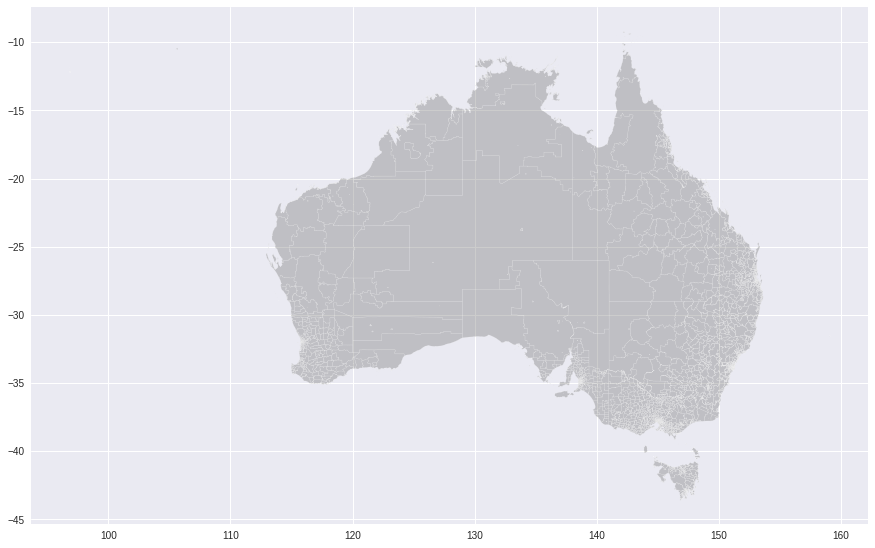

In [188]:
fig,ax = plt.subplots(figsize=(15,15))
aus_map.plot(ax=ax, alpha=0.4, color='grey')

In [189]:
aus_map.head()

,POA_NAME,code,state,geometry
0,6000,6000,None,"POLYGON ((115.86782 -31.95340, 115.86782 -31.9..."
1,6003,6003,None,"MULTIPOLYGON (((115.85039 -31.94570, 115.85065..."
2,6004,6004,None,"POLYGON ((115.86782 -31.95340, 115.86781 -31.9..."
3,6005,6005,None,"POLYGON ((115.84809 -31.93646, 115.84809 -31.9..."
4,6006,6006,None,"POLYGON ((115.84641 -31.92420, 115.84635 -31.9..."


In [190]:
vic_map = aus_map.query('code >= 3000 & code <= 3999')        #For state of Victoria
vic_map.head()

,POA_NAME,code,state,geometry
518,3233,3233,VIC,"POLYGON ((143.60438 -38.76225, 143.60369 -38.7..."
519,3237,3237,VIC,"POLYGON ((143.57296 -38.57897, 143.57286 -38.5..."
520,3238,3238,VIC,"MULTIPOLYGON (((143.44458 -38.72032, 143.44607..."
521,3239,3239,VIC,"POLYGON ((143.57296 -38.57897, 143.57295 -38.5..."
522,3249,3249,VIC,"POLYGON ((143.46871 -38.28057, 143.46875 -38.2..."


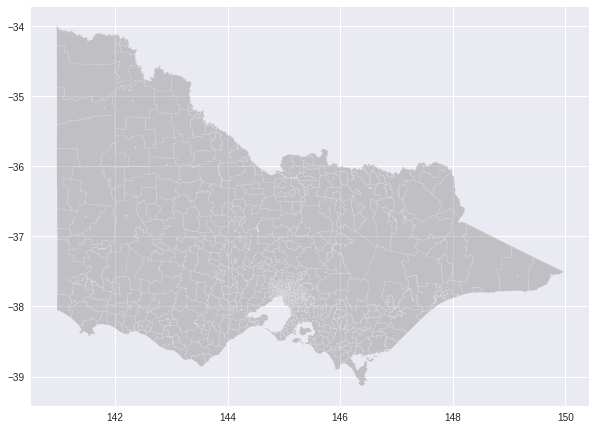

In [191]:
fig,ax = plt.subplots(figsize=(10,10))
vic_map.plot(ax=ax, alpha=0.4, color='grey')

In [192]:
melb_map = aus_map.query('code >= 2950 & code <= 3200')        #For Melbourne city and nearby suburbs
melb_map.head()

,POA_NAME,code,state,geometry
686,3003,3003,VIC,"POLYGON ((144.90644 -37.80885, 144.90671 -37.8..."
687,3008,3008,VIC,"POLYGON ((144.94299 -37.81280, 144.94371 -37.8..."
688,3011,3011,VIC,"POLYGON ((144.87939 -37.80056, 144.87967 -37.7..."
689,3012,3012,VIC,"POLYGON ((144.86355 -37.77651, 144.86384 -37.7..."
690,3013,3013,VIC,"POLYGON ((144.87325 -37.82439, 144.87273 -37.8..."


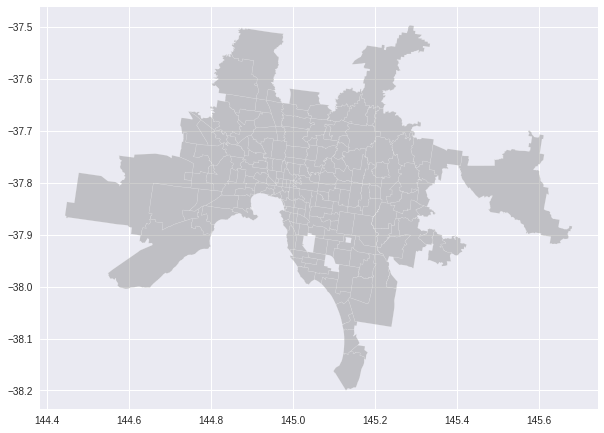

In [193]:
fig,ax = plt.subplots(figsize=(10,10))
melb_map.plot(ax=ax, alpha=0.4, color='grey')

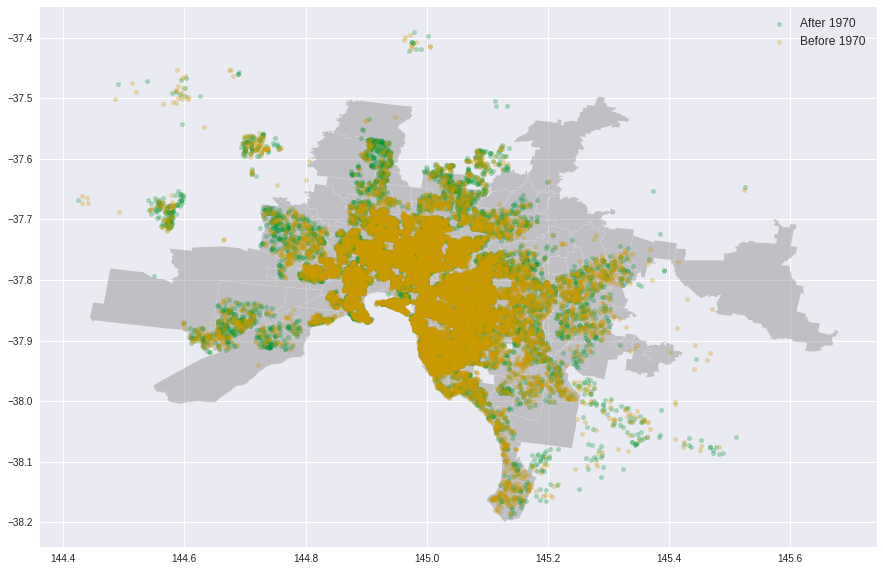

In [194]:
fig,ax = plt.subplots(figsize=(15,15))
melb_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['YearBuilt']>=1970].plot(ax=ax, markersize=20, alpha=0.3, color='#009933', label='After 1970')
geo_df[geo_df['YearBuilt']<1970].plot(ax=ax, markersize=20, alpha=0.3, color='#cc9900', label='Before 1970')
plt.legend(prop={'size':12})

In [195]:
# Majority of building built before 1970 are located in the centre of Melbourne.